<center><img src="https://polytech.univ-lyon1.fr/uas/polytech/LOGO/UDL_logo_blanc-01%20(2).png" alt="drawing" style="width:100px;"/></center>

# Introduction à Python pour la Data Science

## Exercices de Data Manipulation

Importer la librairie Pandas(import).

In [1]:
import pandas as pd

## Exercice 1

### Question 1
Importer le fichier«Produits.xlsx» dans un Data.frame (read_excel) (voir http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html ). 


In [2]:
data = pd.read_excel('../Data/Produits.xlsx')
data.sample(5)

,Nom,Categorie,Origine,Ville,Prix,Stock,Valeur
26,Ikura,Poissons et fruits de mer,Exterieur,Paris,155.0,0,0.0
57,Sasquatch Ale,Boissons,CEE,Lyon,70.0,15,1050.0
28,Ipoh Coffee,Boissons,Exterieur,Paris,230.0,25,5750.0
67,Teatime Chocolate Biscuits,Desserts,Exterieur,Lyon,46.0,5,230.0
66,Tarte au sucre,Desserts,Exterieur,Paris,246.5,0,0.0


### Question 2

Afficher les informations concernant l’ensemble de données importé (info). 

Combien y a-t-il d’observations et de variables dans le fichier ?

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Nom        77 non-null     object 
 1   Categorie  77 non-null     object 
 2   Origine    77 non-null     object 
 3   Ville      77 non-null     object 
 4   Prix       77 non-null     float64
 5   Stock      77 non-null     int64  
 6   Valeur     77 non-null     float64
dtypes: float64(2), int64(1), object(4)
memory usage: 4.3+ KB


Il y a 77 observations et 7 variables dans le fichier.

### Question 3

Afficher les 10 premières lignes des données (head).

In [4]:
data.head(10)

,Nom,Categorie,Origine,Ville,Prix,Stock,Valeur
0,Alice Mutton,Viandes,CEE,Lyon,195.00,0,0.0
1,Aniseed Syrup,Condiments,Exterieur,Paris,50.00,25,1250.0
2,Boston Crab Meat,Poissons et fruits de mer,Exterieur,Paris,92.00,30,2760.0
3,Camembert Pierrot,Produits laitiers,Exterieur,Paris,170.00,0,0.0
4,Carnarvon Tigers,Poissons et fruits de mer,Exterieur,Lyon,312.50,0,0.0
5,Chai,Boissons,CEE,Lyon,90.00,10,900.0
6,Chang,Boissons,Exterieur,Lyon,95.00,25,2375.0
7,Chartreuse verte,Boissons,Exterieur,Lyon,90.00,5,450.0
8,Chef Antons Cajun Seasoning,Condiments,CEE,Lyon,110.00,0,0.0
9,Chef Antons Gumbo Mix,Condiments,CEE,Paris,106.75,0,0.0


### Question 4

Extraire le Nom, Catégorie, Origine et Prix des produits, pour :
- Catégorie= boissons
- Catégorie= boissons et prix >100
- Catégorie= boissons et origine=CEE et prix > 100
- Catégorie= boissons ou catégorie = condiments
- Catégorie= boissons et origine = CEE OU catégorie = condiment
- Catégorie= viande ET origine = CEE OU catégorie = condiment ET origine = extérieur
- prix > 70 et prix <=100
- Lister les aliments dont le prix est compris entre 100 et 200, et qui sont des «viandes»
- Lister les 15 produits les moins chers
- Calculer la moyenne de prix des boissons distribuées à Lyon(pivot_table)
- Quels sont les 5 produits les moins chers vendus à Lyon?

In [5]:
# Catégorie= boissons
data[data["Categorie"]=="Boissons"][["Nom","Categorie","Origine","Prix"]]

,Nom,Categorie,Origine,Prix
5,Chai,Boissons,CEE,90.00
6,Chang,Boissons,Exterieur,95.00
7,Chartreuse verte,Boissons,Exterieur,90.00
11,Côte de Blaye,Boissons,CEE,1317.50
21,Guarana Fantastica,Boissons,Exterieur,22.50
28,Ipoh Coffee,Boissons,Exterieur,230.00
31,Lakkalikoori,Boissons,CEE,90.00
32,Laughing Lumberjack Lager,Boissons,CEE,70.00
45,Outback Lager,Boissons,Exterieur,75.00
53,Rhonbrau Klosterbier,Boissons,CEE,38.75


In [6]:
# Catégorie= boissons et prix >100
data[(data["Categorie"]=="Boissons")&(data["Prix"]>100)][["Nom","Categorie","Origine","Prix"]]

,Nom,Categorie,Origine,Prix
11,Côte de Blaye,Boissons,CEE,1317.5
28,Ipoh Coffee,Boissons,Exterieur,230.0


In [7]:
# Catégorie= boissons et origine=CEE et prix > 100
data[data["Categorie"]=="Boissons"][data["Prix"]>100][data["Origine"]=="CEE"][["Nom","Categorie","Origine","Prix"]]
# Catégorie= boissons ou catégorie = condiments
data[(data["Categorie"]=="Boissons") | (data["Categorie"]=="Condiments")][["Nom","Categorie","Origine","Prix"]]
# Catégorie= boissons et origine = CEE OU catégorie = condiment
data[(data["Categorie"]=="Boissons")&(data["Origine"]=="CEE")|(data["Categorie"]=="Condiments")][["Nom","Categorie","Origine","Prix"]]
# Catégorie= viande ET origine = CEE OU catégorie = condiment ET origine = extérieur
data[(data["Categorie"]=="Viandes")&(data["Origine"]=="CEE") | (data["Categorie"]=="Condiments")&(data["Origine"]=="Exterieur")][["Nom","Categorie","Origine","Prix"]]
# prix > 70 et prix <=100
data[data["Prix"]>70][data["Prix"]<=100][["Nom","Categorie","Origine","Prix"]]

C:\Users\pmaze\AppData\Local\Temp/ipykernel_25716/3277458682.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data["Categorie"]=="Boissons"][data["Prix"]>100][data["Origine"]=="CEE"][["Nom","Categorie","Origine","Prix"]]
C:\Users\pmaze\AppData\Local\Temp/ipykernel_25716/3277458682.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data["Prix"]>70][data["Prix"]<=100][["Nom","Categorie","Origine","Prix"]]


,Nom,Categorie,Origine,Prix
2,Boston Crab Meat,Poissons et fruits de mer,Exterieur,92.00
5,Chai,Boissons,CEE,90.00
6,Chang,Boissons,Exterieur,95.00
7,Chartreuse verte,Boissons,Exterieur,90.00
16,Genen Shouyu,Condiments,CEE,77.50
23,Gula Malacca,Condiments,CEE,97.25
27,Inlagd Sill,Poissons et fruits de mer,Exterieur,95.00
31,Lakkalikoori,Boissons,CEE,90.00
35,Louisiana Hot Spiced Okra,Condiments,CEE,85.00
38,Maxilaku,Desserts,CEE,100.00


In [8]:
# Lister les aliments dont le prix est compris entre 100 et 200, et qui sont des «viandes»
data["Nom"][data["Categorie"]=="Viandes"][data["Prix"]>=100][data["Prix"]<=200]
# Lister les 15 produits les moins chers
data.sort_values("Prix").head(15)["Nom"]

15                           Geitost
21                Guarana Fantastica
30                             Konbu
13                          Filo Mix
70                         Tourtiere
53              Rhonbrau Klosterbier
71                          Tunnbrod
67        Teatime Chocolate Biscuits
55                       Røgede sild
76                     Zaanse koeken
29    Jacks New England Clam Chowder
33                     Longlife Tofu
1                      Aniseed Syrup
62                Sir Rodneys Scones
64                         Spegesild
Name: Nom, dtype: object

In [9]:
# Calculer la moyenne de prix des boissons distribuées à Lyon(pivot_table)
import numpy as np

pd.pivot_table(data[(data["Categorie"]=="Boissons")& (data["Ville"]=="Lyon")], index=["Categorie", "Ville"], values=["Prix"], aggfunc=np.mean)

,,Prix
Categorie,Ville,
Boissons,Lyon,76.944444


In [8]:
# Quels sont les 5 produits les moins chers vendus à Lyon?
data[data["Ville"]=="Lyon"].sort_values("Prix").head(5)["Nom"]

15                       Geitost
21            Guarana Fantastica
30                         Konbu
67    Teatime Chocolate Biscuits
76                 Zaanse koeken
Name: Nom, dtype: object

## Exercice 2

Importer le dataset euro12.

In [9]:
data = pd.read_csv('../Data/euro12.csv')

### Question 1

Combien de participants à cette compétition ? 

In [15]:
print("Il y a",data['Team'].count(),"participants à cette compétition")

Il y a 16 participants à cette compétition


### Question 2

Garder uniquement les colonnes Team, Yellow Cards and Red Cards que vous assignerez à un nouveau dataframe nommé discipline.

In [18]:
colonne = ['Team', 'Yellow Cards','Red Cards']
discipline = data.loc[:,colonne]
discipline.sample(5)

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
3,England,5,0
12,Russia,6,0
6,Greece,9,1
11,Republic of Ireland,6,1


### Question 3

Triez les valeurs par nombre de cartons rouges puis de cartons jaunes. 

In [20]:
discipline.sort_values(["Red Cards",'Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


### Question 4

Combien d'équipes ont marqué plus de 6 buts ? 

In [27]:
print("Il y a",data.loc[(data['Goals'] > 6), ['Team', 'Goals']]['Team'].count(),"équipes qui ont marqué plus de 6 buts")

Il y a 2 équipes qui ont marqué plus de 6 buts


## Exercice 3

Importer le dataset alcohol.

In [29]:
data = pd.read_csv('../Data/alcohol.csv')
data.sample(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
138,South Korea,140,16,9,9.8,AS
179,Uganda,45,9,0,8.3,AF
23,Brazil,245,145,16,7.2,SA
49,Djibouti,15,44,3,1.1,AF
24,Brunei,31,2,1,0.6,AS


### Question 1

Quel continent boit le plus de bières en moyenne ?

In [31]:
data.groupby('continent').beer_servings.mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

### Question 2

Quelle est la consommation moyenne par continent de chaque type de boisson ?

In [33]:
data.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### Question 3

Afficher la médiane, le minimum et le maximum de la colonne "spirit servings".

In [35]:
data.groupby('continent').spirit_servings.agg(['mean', 'min', 'max'])

,mean,min,max
continent,,,
AF,16.339623,0,152
AS,60.840909,0,326
EU,132.555556,0,373
OC,58.437500,0,254
SA,114.750000,25,302


## Exercice 4

Importer le dataset us_crime_rates. 

In [26]:
data = pd.read_csv('../Data/us_crime_rates.csv')

La décennie 60 comprend les années entre 1960 et 1969. Le dataset us_crime_rates donne les sommes cumulatives par années de différents indicateurs.  

### Question 1

Créer le dataframe qui donne chaque indicateur pour chaque décennie. Résultat ci-dessous.

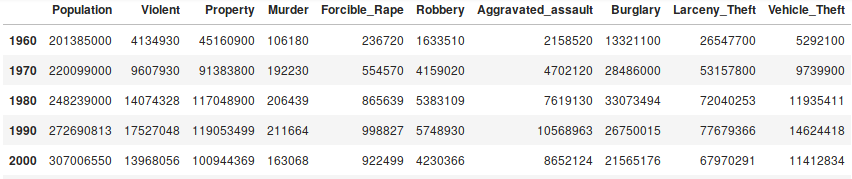

In [10]:
from IPython.display import Image
Image("img/tableau.png")

In [27]:
data.Year = pd.to_datetime(data.Year, format='%Y')

data = data.set_index('Year', drop = True)

del data['Total']

data = data.resample('10AS').sum()

population = data['Population'].resample('10AS').max()

data['Population'] = population

data

### Question 2

Quelle était la plus dangereuse décennie aux USA ? 

In [39]:
data.idxmax(0)

Population           2000-01-01
Violent              1990-01-01
Property             1990-01-01
Murder               1990-01-01
Forcible_Rape        1990-01-01
Robbery              1990-01-01
Aggravated_assault   1990-01-01
Burglary             1980-01-01
Larceny_Theft        1990-01-01
Vehicle_Theft        1990-01-01
dtype: datetime64[ns]

## Enseignant
Patrice Mazel - patrice.mazel@protonmail.com - 3A MAM 2021/2022